In [1]:
%reset
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from functions import loader, splt, fitter, stats, grouper
import matplotlib.pyplot as plt

savedir = "E01/"

In [3]:
all_data = loader.load_data()
data = loader.remove_duplicates( all_data,
    lambda d: ( d['dep_polymers'], d['side'], d['defects_frac'], d['gamma'] ),
    lambda d: d['runned_replicas']
)
len( data )

132

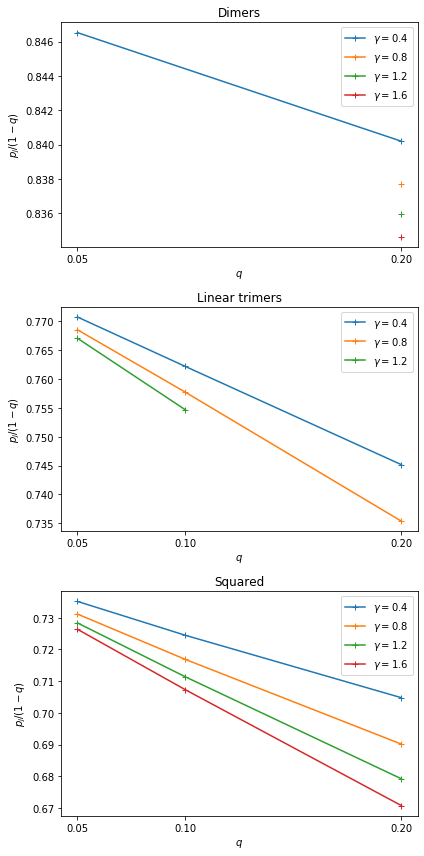

In [4]:
#TODO properly select side

filtered_data = data[ np.vectorize( lambda d: ( d['side'] == 1024 ) )(data) ]

splt.iterate(
    len( filtered_data ),
    lambda d: filtered_data[d]['dep_polymers'],
    lambda d: 0,
    lambda d: filtered_data[d]['gamma'],
    lambda d: filtered_data[d]['defects_frac'],
    lambda d: [
        filtered_data[d]['pj_over_1_minus_q_avg'],
    ],
    lambda r, c, l: [
        { 'label': fr"$\gamma = {l:.1f}$", 'ls': '-', 'marker': '+' }
    ],
    lambda r, c: (
        plt.title( fr"{r}" ),
        # plt.xscale( 'log', basex = 2 ),
        # plt.yscale( 'log', basey = 10 ),
        plt.xlabel( fr"$q$" ),
        # splt.hline( 0 ),
        plt.ylabel( fr"$p_j / ( 1 - q )$" )
    )
)

plt.tight_layout()
plt.savefig( savedir + "jamming.pdf" )